In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import operator

%matplotlib inline

In [2]:
train = pd.read_csv('../data/train.csv', index_col='ID')
test = pd.read_csv('../data/test.csv', index_col='ID')

In [3]:
raw = pd.concat([train[train.columns.drop('TARGET')], test], axis=0)

In [6]:
features = train.columns.drop('TARGET')

## Exploratory Data Analysis

In [7]:
not_satisfied = train[train.TARGET == 0][features]
satisfied = train[train.TARGET == 1][features]

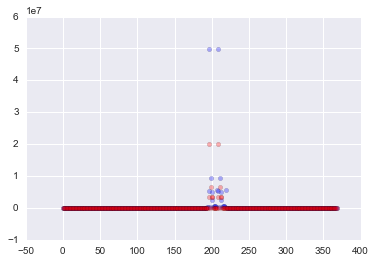

In [95]:
not_satisfied_mean = not_satisfied.mean()
plt.scatter(np.arange(len(features)), not_satisfied_mean, c='b', alpha=0.3)

satisfied_mean = satisfied.mean()
plt.scatter(np.arange(len(features)), satisfied_mean, c='r', alpha=0.3);

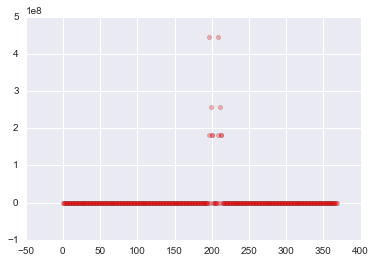

In [108]:
# not_satisfied_std = not_satisfied.std()
# plt.scatter(np.arange(len(features)), not_satisfied_std, c='b', alpha=.3)

satisfied_std = satisfied.std()
plt.scatter(np.arange(len(features)), satisfied_std, c='r', alpha=.3);

In [137]:
feature_range = np.arange(len(features))
colors = np.in1d(feature_range, np.arange(0, 150)).astype(int) + 2*np.in1d(feature_range, np.arange(150, 225)).astype(int) +\
         3* np.in1d(feature_range, np.arange(225, 300)).astype(int) + 4 * np.in1d(feature_range, np.arange(300, 369)).astype(int)

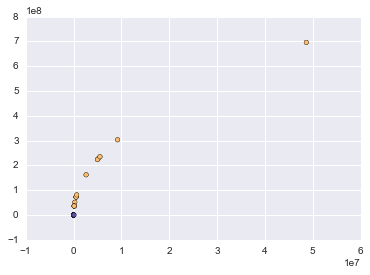

In [140]:
plt.scatter(train[features].mean(), train[features].std(), c=colors, cmap=plt.cm.Spectral);

In [153]:
## look for features which have both mean and standard deviation above a certain value
curious_features = []
for i in range(len(features)):
    if train[features[i]].mean() > 4e7 and train[features[i]].std() > 6e8:
        curious_features.append(features[i])

In [155]:
curious_features

['delta_imp_aport_var13_1y3', 'delta_num_aport_var13_1y3']

In [159]:
train.groupby(['delta_imp_aport_var13_1y3','TARGET']).size()

delta_imp_aport_var13_1y3  TARGET
-1.000000e+00              0          1670
                           1             5
-9.038462e-01              0             1
-8.333333e-01              0             1
-8.000000e-01              0             1
-7.602877e-01              0             1
-6.666667e-01              0             1
-5.000000e-01              0             2
-4.995000e-01              0             1
-3.494898e-01              0             1
-3.333333e-01              0             2
-2.910826e-01              0             1
-1.973684e-01              0             1
-1.000000e-01              0             1
-9.090909e-02              0             1
 0.000000e+00              0         70951
                           1          2997
 1.538462e-01              0             1
 1.605039e-01              0             1
 4.000000e-01              0             1
 1.000000e+00              0             1
 1.181818e+00              0             1
 1.222222e+00       

In [110]:
# lets look at the two features just uncovered
features[196]

'delta_imp_aport_var13_1y3'

In [112]:
not_satisfied[features[196]].mean()

49854818.358379655

In [113]:
satisfied[features[196]].mean()

19946808.506981384

In [114]:
not_satisfied[features[196]].value_counts()

 0.000000e+00    70951
-1.000000e+00     1670
 1.000000e+10      364
-5.000000e-01        2
 4.000000e+00        2
-3.333333e-01        2
-4.995000e-01        1
 4.000000e-01        1
 1.000000e+00        1
-8.333333e-01        1
-8.000000e-01        1
-2.910826e-01        1
 2.333092e+00        1
-1.000000e-01        1
 1.538462e-01        1
 1.222222e+00        1
-9.038462e-01        1
-9.090909e-02        1
 5.500000e+00        1
 1.181818e+00        1
 1.605039e-01        1
-1.973684e-01        1
 1.777778e+00        1
-6.666667e-01        1
-7.602877e-01        1
 1.445714e+00        1
-3.494898e-01        1
Name: delta_imp_aport_var13_1y3, dtype: int64

In [161]:
np.amax([[0, 2], [2, 1]], axis=0)

array([2, 2])

In [115]:
satisfied[features[196]].value_counts()

 0             2997
 9999999999       6
-1                5
Name: delta_imp_aport_var13_1y3, dtype: int64

In [111]:
for i in range(170, 220):
    print 'feature index %d and std is %f ' %(i, satisfied[features[i]].mean())

feature index 170 and std is 0.000000 
feature index 171 and std is 895.566951 
feature index 172 and std is 7.639269 
feature index 173 and std is 96.806918 
feature index 174 and std is 0.000000 
feature index 175 and std is 0.000000 
feature index 176 and std is 823.795751 
feature index 177 and std is 94.699518 
feature index 178 and std is 90.966144 
feature index 179 and std is 0.000000 
feature index 180 and std is 0.000000 
feature index 181 and std is 0.000000 
feature index 182 and std is 2164.364721 
feature index 183 and std is 134.692101 
feature index 184 and std is 3.733374 
feature index 185 and std is 0.000000 
feature index 186 and std is 0.000000 
feature index 187 and std is 47.329099 
feature index 188 and std is 10.985436 
feature index 189 and std is 0.000000 
feature index 190 and std is 1268.797769 
feature index 191 and std is 37.885183 
feature index 192 and std is 0.000000 
feature index 193 and std is 64.464428 
feature index 194 and std is 0.000000 
featur

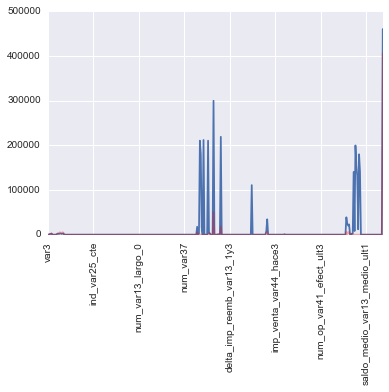

In [15]:
not_satisfied.quantile(q=0.99).plot()
satisfied.quantile(q=0.99).plot(color='r', alpha=0.3)
plt.xticks(rotation=90);

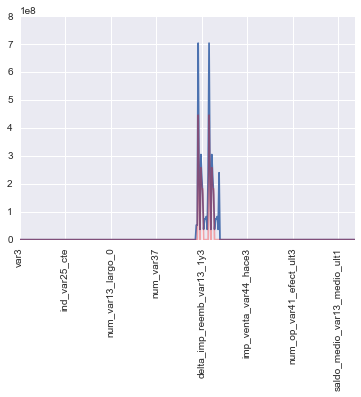

In [65]:
not_satisfied.std().plot()
satisfied.std().plot(color='r', alpha=0.3)
plt.xticks(rotation=90);

In [70]:
train.std().sort_values(ascending=False)

delta_num_aport_var13_1y3        6.959537e+08
delta_imp_aport_var13_1y3        6.959537e+08
delta_imp_compra_var44_1y3       3.033108e+08
delta_num_compra_var44_1y3       3.033108e+08
delta_imp_venta_var44_1y3        2.349869e+08
delta_num_venta_var44_1y3        2.349869e+08
delta_imp_aport_var17_1y3        2.264435e+08
delta_num_aport_var17_1y3        2.264435e+08
delta_num_reemb_var13_1y3        2.235230e+08
delta_imp_reemb_var13_1y3        2.235230e+08
delta_num_reemb_var17_1y3        1.621798e+08
delta_imp_reemb_var17_1y3        1.621798e+08
delta_num_trasp_var33_in_1y3     8.109791e+07
delta_imp_trasp_var33_in_1y3     8.109791e+07
delta_imp_trasp_var17_out_1y3    7.253665e+07
delta_num_trasp_var17_out_1y3    7.253665e+07
delta_imp_trasp_var17_in_1y3     7.253665e+07
delta_num_trasp_var17_in_1y3     7.253665e+07
delta_imp_amort_var34_1y3        5.129183e+07
delta_imp_amort_var18_1y3        5.129183e+07
delta_imp_trasp_var33_out_1y3    3.626904e+07
delta_num_trasp_var33_out_1y3    3

In [94]:
pd.pivot_table(train, index='TARGET', values='var3', columns='var15', aggfunc='mean', fill_value=0)

var15,5,6,7,8,9,10,11,12,13,14,...,95,96,97,98,99,100,101,102,104,105
TARGET,,,,,,,,,,,,,,,,,,,,,
0,0,1.952381,2,2,2,2,1.947368,2,2,2,...,2,2,2,2,2,2,2,2,2,2
1,0,0.000000,0,0,0,0,0.000000,0,0,0,...,0,0,0,0,0,0,0,2,0,0


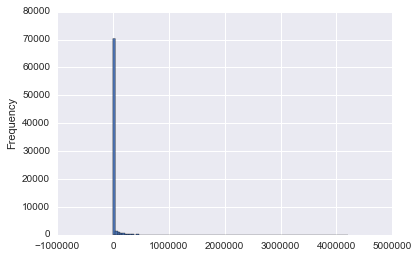

In [81]:
test.saldo_var30.plot(kind='hist', bins=100);

## Unsupervised Learning

In [23]:
from sklearn.manifold import TSNE

In [ ]:
# add boolean indicators whether value is an outlier or not
def outlier_indicator(row):

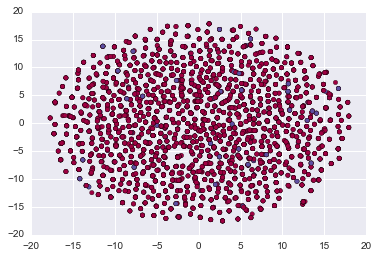

In [33]:
tsne = TSNE(n_components=2, perplexity=2.0, init='random', random_state=0)
Y_transformed = tsne.fit_transform(X_train)
plt.scatter(Y_transformed[:, 0], Y_transformed[:, 1], c=y_train, cmap=plt.cm.Spectral);

** It seems it is very hard to isolate satisfied customers from ones that are not so satisfied **

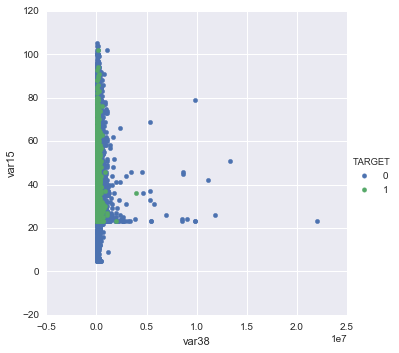

In [8]:
sns.FacetGrid(train, hue='TARGET', size=5) \
    .map(plt.scatter, 'var38', 'var15') \
    .add_legend();

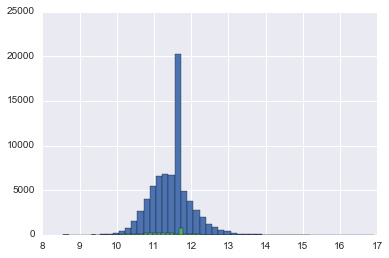

In [12]:
plt.hist(np.log1p(1 + train[train.TARGET==0].var38), bins=50)
plt.hist(np.log1p(1 + train[train.TARGET==1].var38), bins=50);

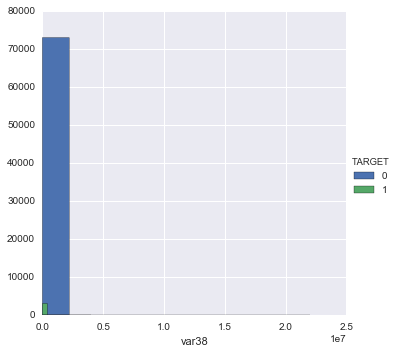

In [9]:
sns.FacetGrid(train, hue='TARGET', size=5) \
    .map(plt.hist, 'var38') \
    .add_legend();

## Principal Component Analysis

In [184]:
from sklearn.decomposition import KernelPCA
from sklearn.preprocessing import StandardScaler

In [207]:
X = train[features].iloc[:10000]
y = train.TARGET.iloc[:10000]

In [208]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [209]:
pca = KernelPCA(n_components=2, kernel='rbf', gamma=.01)
X_pca = pca.fit_transform(X_scaled, y)

In [210]:
negative_class_labels = (y==0).values
positive_class_labels = (y==1).values

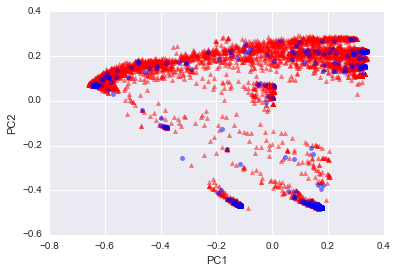

In [211]:
colors = ['b', 'g']
markers = ['s', 'x']

plt.scatter(X_pca[negative_class_labels, 0], X_pca[negative_class_labels, 1],
            color='red', marker='^', alpha=.5)

plt.scatter(X_pca[positive_class_labels, 0], X_pca[positive_class_labels, 1],
            color='blue', marker='o', alpha=.5)

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show();

In [222]:
print 'Total number of features %d and features with value greater than 90th percentile for satisfied customers %d ' %(len(features),\
                                                                                                                      count)

Total number of features 369 and features with value greater than 90th percentile for satisfied customers 80 
